 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.

<b> Instructions </b>

1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.

<b> Part(a): Synthetic data generation </b>

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each having a variance of 0.3. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.
2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

3. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>

1. Write a function called kNNClassify that accepts training data, a test point, and the hyperparameter 'k' as input and returns the label of the test point. Pick a reasonable 'k' for this experiment. Use "kNNClassify" function to generate the labels for the test data generated in part(a) of this PA. Compare the predicted labels with the original labels and calculate the portion of test data points that are correctly classified. In other words, calculate the accuracy of the classifier.
2. Create a visual representation of the predictions by plotting all data points in a 2D plane. Assign green and blue colors to represent class 1 and class 2, respectively. For test data points that are misclassified, assign the color red.
3. Generate and visualize the decision regions of 2D plane that are associated with each class, for a given classifier. Decision regions can be created by classifying all the data points in the 2D grid and assigning class-specific colors to them.

<b> Part(c): Parameter selection: What is good value for k? - </b> One intuitive approach to determine the optimal 'k' is through cross-validation. During cross-validation, a ρ% portion of the training dataset is utilized as the validation dataset, and the model's performance is assessed on this validation set with various 'k' values. Through these cross-validation experiments, we select the 'k' that yields the best performance on the validation data.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check
   if there is an improvement on the classification error over the result of Part 2.

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
   grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.
2. Try classifying more difficult datasets, for instance, by increasing the variance or adding noise by randomly flipping the labels on the training set.

<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.

<b> Part(f): MNIST Digit classification using KNN classifier: </b> : This part will not be graded. However, you are recommended to work on it to get exposure to the practical applications of the KNN classifier.

1. Modify the function kNNClassify to handle multi-class problems and hence design a KNN classifier to classify the images in MNIST dataset as one of the 10 digits. The 28x28 images may be flattened to arrive at a 784 dimensional vector. NOTE: If you had already written a kNNClassify for multi class classification in part1 (b), you are free to use it.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%.
3. Empirically determine the most suitable error function, and the corresponding k to maximize the performance on the cross-validation experiments.
4. Apply these values to evaluate the performance on the test dataset.
5. Create a confusion matrix to understand the most confused classes (digits).
6. Suggest alternate ways to improve the performance.


In [316]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
# %pip install scikit-learn
from sklearn.datasets import fetch_openml


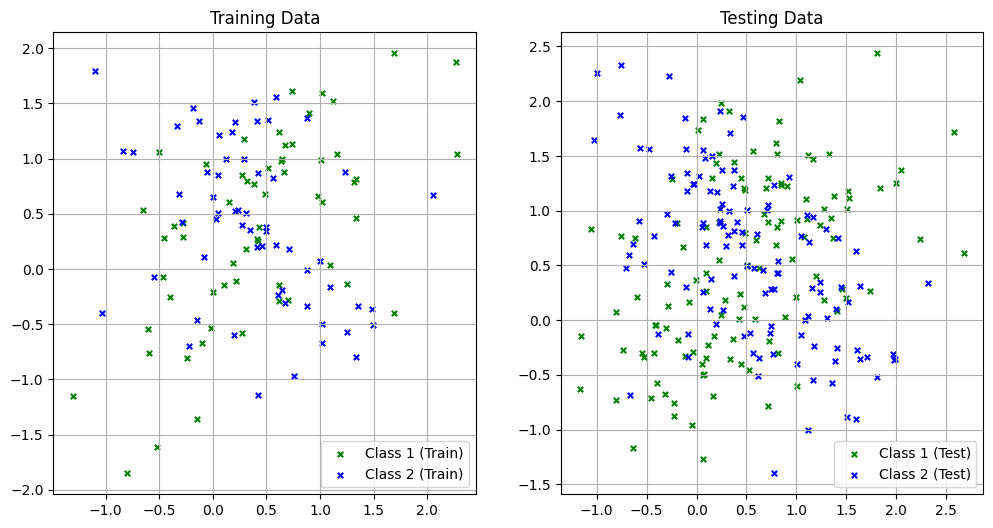

In [317]:
########################################
#Part(a) #Synthetic data generation
########################################
#Define means and covariances
mean1=[0,0]
mean2=[0,1]
mean3=[1,0]
mean4=[1,1]
cov=[[0.3,0],[0,0.3]]

#Sample data points from the bivariate Gaussian distribution
#You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution

def Generate_data(mean1,mean2,mean3,mean4,cov,sp,trp,tep):

    ''' 
    Inputs : mean1,mean2,mean3,mean4,covariencp,points per sample,training points per sample,testing points per sample
    Outputs : X_train, Y_train, X_test, Y_test
    '''
    sample1=np.random.multivariate_normal(mean1,cov,sp)
    sample2=np.random.multivariate_normal(mean2,cov,sp)
    sample3=np.random.multivariate_normal(mean3,cov,sp)
    sample4=np.random.multivariate_normal(mean4,cov,sp)


    #Generate training data
    train1=sample1[:trp]
    train2=sample2[:trp]
    train3=sample3[:trp]
    train4=sample4[:trp]

    #Generate testing data
    test1=sample1[trp:]
    test2=sample2[trp:]
    test3=sample3[trp:]
    test4=sample4[trp:]

    #class 1 for mean (0,0) and (1,1) , use 1 and 4
    #making by 30 by 1 array containing +1, labels of class1
    train1_labels=np.ones((trp,1))
    train4_labels=np.ones((trp,1))

    #class 2 for mean (0,1) and (1,0), use 2 and 3, labe is -1
    #making by 30 by 1 array containing -1, labels of class2
    train3_labels=-np.ones((trp,1))
    train2_labels=-np.ones((trp,1))

    #concatenation training data with respective labels
    #in unshuffled X_train, the top 60 belong to class 1 and bottom 60 belong to class 2
    X_train=np.concatenate((train1,train4,train2,train3),axis=0)
    Y_train=np.concatenate((train1_labels,train4_labels,train2_labels,train3_labels),axis=0)

    #do same for test data
    test1_labels=np.ones((tep,1))
    test4_labels=np.ones((tep,1))
    test2_labels=-np.ones((tep,1))
    test3_labels=-np.ones((tep,1))
    
    #concatenating such that top ones belong to class 1 and bottom belong to class 2
    X_test=np.concatenate((test1,test4,test2,test3),axis=0)
    Y_test=np.concatenate((test1_labels,test4_labels,test2_labels,test3_labels),axis=0)

    return X_train, Y_train, X_test, Y_test



sp = 90 #pts for each sample (mean,cov)
trp = 30 #training pts per sample
tep = sp-trp #testing pts per sample

#2 classes, 1 class corresponds to 2 samples
cp = sp*2 #total pts per class
ctrp = trp*2 #total training pts per class
ctep = tep*2 #total testing pts per class

X_train, Y_train, X_test, Y_test = Generate_data(mean1,mean2,mean3,mean4,cov,sp,trp,tep)

# print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

#Visualize the data using plt.scatter() function
#creating 2 plots, 1 for training and 1 for testing data
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

#for traing data set
axes[0].set_title('Training Data')
axes[0].scatter(X_train[:ctrp,0],X_train[:ctrp,1],c='green',label='Class 1 (Train)',marker='x',s=15)    #the top ctrp belongs to class 1
axes[0].scatter(X_train[ctrp:,0],X_train[ctrp:,1],c='blue',label='Class 2 (Train)',marker='x',s=15)     #the bottom 60 belongs to class 2


#for testing data set
axes[1].set_title('Testing Data')
axes[1].scatter(X_test[:ctep,0],X_test[:ctep,1],c='green',label='Class 1 (Test)',marker='x',s=15)
axes[1].scatter(X_test[ctep:,0],X_test[ctep:,1],c='blue',label='Class 2 (Test)',marker='x',s=15)

axes[0].legend()
axes[1].legend()
axes[0].grid()
axes[1].grid()
plt.show()



accuracy = 63.33%


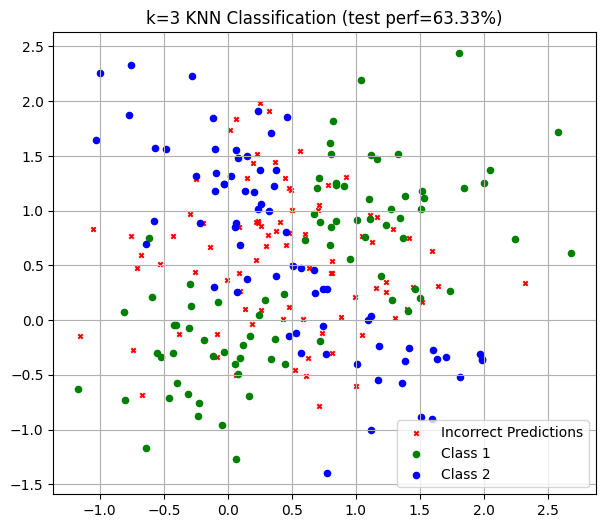

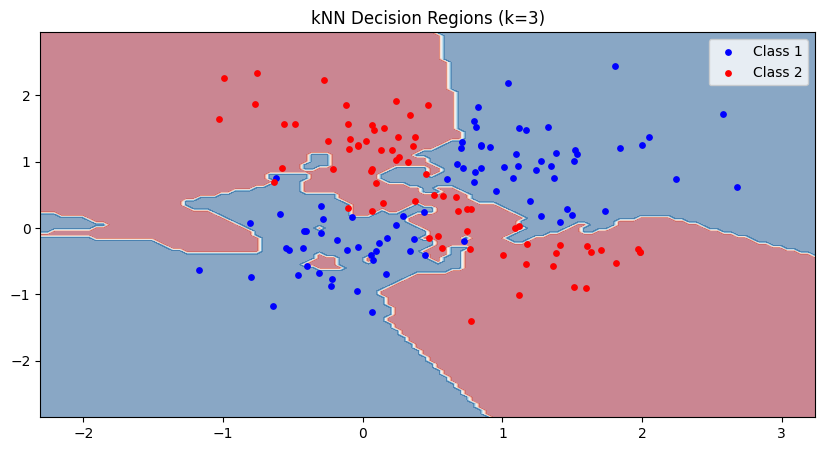

In [318]:
########################################
#Part(b) #KNN classification
########################################

#Write "kNNClassify" function
def kNNClassify(X_train,Y_train,X_test,k,distance_function):
  '''
  #Inputs : Training data (X_train,Y_train), Test points  (X_test), Hyperparameter k,distance_metric
  #Outputs : Predicted class
  '''
  #Algorithm
  #1.Initialize a list to store the predictions of our algorithm
  #2.Iterate through the test points
  #3.    Initialize a list to store the distances of test point with each of the training point.
  #4.    Iterate through the training points
  #5.        Compute the distance between the test and train point
  #6.    Find out the k nearest neighbours
  #7.    Get the most frequent label of k nearest neighbours
  #8.Return the predictions
  #Fill the code

  #initializing list to store predictions along with data point [coord,predicted_label]
  test_predictions=[]
  
  #iterating through test points
  for i in range(X_test.shape[0]):
    
    #initializing a list to store distances and labels [dist,label]
    distances=[]
    test_data_point = X_test[i]
    #iterating through training points and computing distances of training points from test point
    for j in range(X_train.shape[0]):
      # print(test_data_point-X_train[j])
      distances.append([distance_function(test_data_point-X_train[j]),Y_train[j]])
    
    #sorting the distances based on the first element of the list (distance)
    distances = sorted(distances,key=lambda x:x[0])
    
    #checking the labels of first k points and storing the number of labels in each class 
    class1,class2=sum(1 for i in range(k) if distances[i][1]==1),sum(1 for i in range(k) if distances[i][1]==-1)
    
    test_predictions.append([list(test_data_point)])
    if(class1>class2):
      test_predictions[i].append(1)  #appending the label of majority class
    else:
      test_predictions[i].append(-1)
  
  return test_predictions
      

#Write "KNNAccuracy" function
def KNNAccuracy(true,pred):
  '''
  #Inputs : Ground truth and predicted labels
  #Outputs : Portion of data points that are correctly classified, i.e., accuracy
  '''
  #Algorithm
  #1. Iterate through the total number of predictions
  #2.     Verify wheter the ground truth matches with the predictions
  #3. Compute and return the percentage of the correctly classified points
  #Fill the code

  #intializing lists to store correct and incorrect predictions data points
  correct_predictions = []
  correct_predictions_labels = []
  incorrect_predictions = []

  #initializing count of the number of labels matching with the predicted labels
  count = 0

  for i in range(min(len(pred),len(true))):
    if(true[i]==pred[i][1]):
      count+=1
      correct_predictions.append(pred[i][0])
      correct_predictions_labels.append(pred[i][1])
    else:
      incorrect_predictions.append(pred[i][0])


  incorrect_predictions = np.array(incorrect_predictions)
  correct_predictions = np.array(correct_predictions)
  correct_predictions_labels = np.array(correct_predictions_labels)
  #returning the accuracy
  return count/len(true)*100 , correct_predictions, correct_predictions_labels,incorrect_predictions
 
k=3 #number of nearest neighbors to be considered
test_predictions=kNNClassify(X_train,Y_train,X_test,k,np.linalg.norm)
knn_accuracy , correct_predictions, correct_predictions_labels,incorrect_predictions=KNNAccuracy(Y_test,test_predictions)

print(f'accuracy = {knn_accuracy:.2f}%')


#Create a visual representation of predictions
plt.figure(figsize=(7,6))

#mark incorrect prediction with red
plt.scatter(incorrect_predictions[:,0],incorrect_predictions[:,1],c='red',label='Incorrect Predictions',marker='x',s=10)

#in correct predictions mark with class 1 as green and class 2 as blue
class1_points = correct_predictions[correct_predictions_labels==1]
class2_points = correct_predictions[correct_predictions_labels==-1]

plt.scatter(class1_points[:,0],class1_points[:,1],c='green',label='Class 1',marker='o',s=20)
plt.scatter(class2_points[:,0],class2_points[:,1],c='blue',label='Class 2',marker='o',s=20)


plt.legend()
plt.title(f'k={k} KNN Classification (test perf={knn_accuracy:.2f}%)')
plt.grid()
plt.show()

#Generate and visualize the decision regions and overlay the test points
def plot_decision_regions(X_train, Y_train, k,class1_points,class2_points,distance_metric,plot_points):
    # Creating a less dense grid of points to classify
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    
    step_size = 0.05  # Increase the step size for a less dense grid
    x_possible = np.arange(x_min, x_max, step_size)
    y_possible = np.arange(y_min,y_max,step_size)
    
    #creates grid of x and y possible to generate any permutated point 
    xx, yy = np.meshgrid(x_possible, y_possible)
    #now (xx[i][j],yy[i][j]) for all i,j generated unique point on grid

    #flattening xx and yy into 1d array
    flattened_xx = xx.ravel()
    flattened_yy = yy.ravel()

    #concatening xx and yy horizontally for input to kNNClassify [list of (x,y)]
    test_input = np.concatenate((flattened_xx.reshape(-1, 1), flattened_yy.reshape(-1, 1)), axis=1)

    # Classifying every point on the grid
    predic=kNNClassify(X_train, Y_train, test_input,k,distance_metric)
    
    Z = [item[1] for item in predic] #storing only labels in z
    Z=np.array(Z)
    # print(Z.shape)

    # Reshape the class predictions into the original grid shape
    Z = Z.reshape(xx.shape)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.RdBu)
    if(plot_points):plt.scatter(class1_points[:,0],class1_points[:,1],c='blue',label='Class 1',marker='o',s=15)
    if(plot_points):plt.scatter(class2_points[:,0],class2_points[:,1],c='red',label='Class 2',marker='o',s=15)
    plt.title(f'kNN Decision Regions (k={k})')
    plt.legend()
    plt.show()

plot_decision_regions(X_train, Y_train, k,class1_points,class2_points,np.linalg.norm,True)


In [319]:
####################################
#Part(c): Parameter selection: What is good value for k?
####################################
#Write holdoutCVkNN() Function

def holdoutCVkNN(k_range, numrep, rho, train_data):
    

    #for training accuracy we will test the data on the same training data points for different k 

    #for validation accuracy we will test the data on validation data points for different k

    train_accuracy_for_k = {k: [] for k in k_range}
    validation_accuracy_for_k = {k: [] for k in k_range}
    
    for rep in range(numrep):
        
        np.random.shuffle(train_data)    
        split_ind = int(rho * train_data.shape[0])
        val_data = train_data[:split_ind]
        training_data = train_data[split_ind:]
        
        X_val, Y_val = val_data[:, :2], val_data[:, 2]  #splitting for only points and removing labels
        X_training, Y_training = training_data[:, :2], training_data[:, 2]  #splitting for only points and removing labels

        for k in k_range:

            # Training accuracy
            train_pred = kNNClassify(X_training, Y_training, X_training, k, np.linalg.norm)
            train_accuracy, temp, temp, temp = KNNAccuracy(Y_training, train_pred)
            train_accuracy_for_k[k].append(train_accuracy)

            # Validation accuracy
            val_pred = kNNClassify(X_training, Y_training, X_val, k, np.linalg.norm)
            validation_accuracy, temp, temp, temp = KNNAccuracy(Y_val, val_pred)
            validation_accuracy_for_k[k].append(validation_accuracy)


    
    return train_accuracy_for_k, validation_accuracy_for_k
 

In [325]:
#dictionary to store mean training and validation accuracy for different k values
mean_train_accuracy_for_k = {}
mean_validation_accuracy_for_k = {}

#meging data points and labels of training data horizontally
train_data = np.concatenate((X_train, Y_train), axis=1)

# Parameters
k_range = [2 * i - 1 for i in range(1, 12)]  # Odd k values from 1 to 21
rho = 0.3  # Fraction of training data for cross-validation
numrep = 10  # Number of repetitions

for i in range(1): 
    #Returns dictionary of list of various accuracies of training and validation for different k
    train_accuracy_for_k, validation_accuracy_for_k = holdoutCVkNN(k_range, numrep, rho, train_data)

    for k in k_range:
        mean_train_accuracy_for_k[k] = np.mean(train_accuracy_for_k[k])
        mean_validation_accuracy_for_k[k] = np.mean(validation_accuracy_for_k[k])

    print(max(mean_validation_accuracy_for_k, key=mean_validation_accuracy_for_k.get))




7


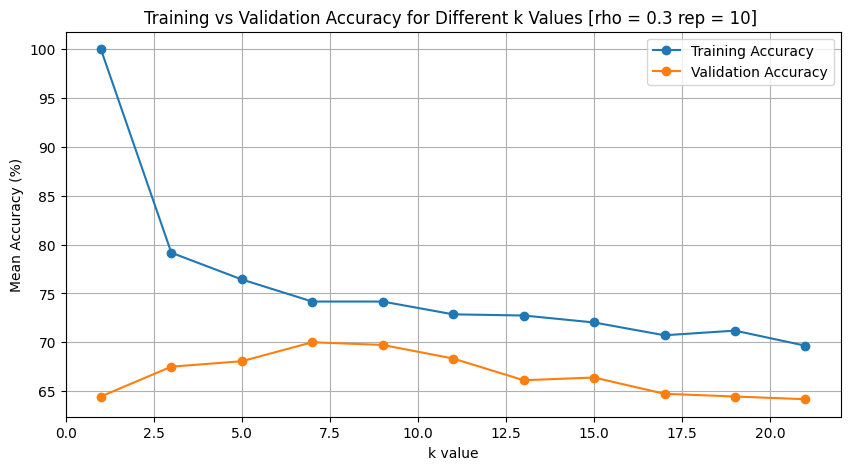

In [326]:
#Plot training and validation errors for different values of k
plt.figure(figsize=(10, 5))
plt.plot(list(mean_train_accuracy_for_k.keys()), list(mean_train_accuracy_for_k.values()), marker='o', label='Training Accuracy')
plt.plot(list(mean_validation_accuracy_for_k.keys()), list(mean_validation_accuracy_for_k.values()), marker='o', label='Validation Accuracy')
plt.xlabel('k value')
plt.ylabel('Mean Accuracy (%)')
plt.title(f'Training vs Validation Accuracy for Different k Values [rho = {rho} rep = {numrep}] ')
plt.legend()
plt.grid()
plt.show()


In [327]:
#what is the best value for k?
#It is the value of k where validation accuracy is maximum
best_k = max(mean_validation_accuracy_for_k,key=lambda x:mean_validation_accuracy_for_k[x])
print(f'parameters: rho = {rho} rep = {numrep}')
print(f'Best k = {best_k} \nBest validation accuracy = {mean_validation_accuracy_for_k[best_k]:.2f}%')


parameters: rho = 0.3 rep = 10
Best k = 7 
Best validation accuracy = 70.00%


Q5: How would you now answer the question "what is the best value for k"? <br>
Ans: The best value of k highly depends rho (fraction of training data used for validation), number of repitations in cross-validation and also the size of data_set. For the current data set where we have 120 training data points, and using rho=0.3 and number of repetitions=10, we can notice a general trend in best value for k, the validation accuracy increases from k=1 to k=5, but then nearly remains constant (or increases slightly) ,and dips(decreases slightly) at the end.The obvious reason would be that very low k values would lead to overfitting and very high k values would lead to underfitting. So, any odd value of k between 5 and 17 can be considered a good k value for current parameters. However, the best k_value still remains highly specific to the parameters. <br><br>


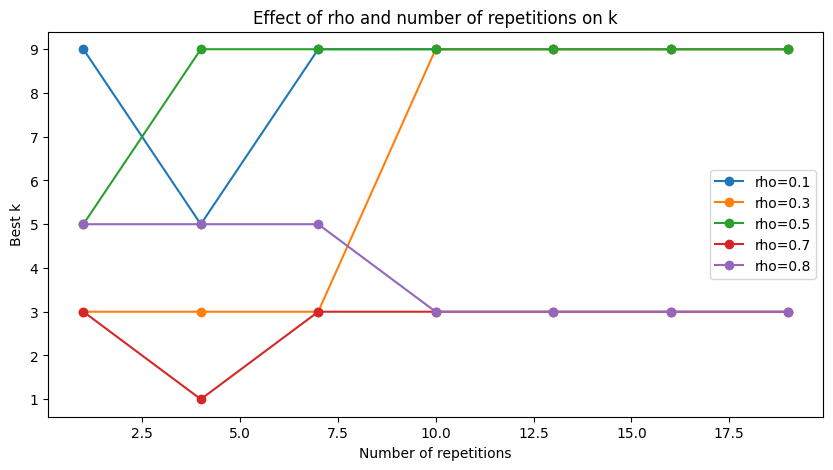

In [328]:
#Effect of rho and number repetations on k
rho_values = [0.1,0.3,0.5,0.7,0.8]
rep_values = np.arange(1,numrep*2+1,step=3)
# print(rep_values)
plot_data = {rho : [] for rho in rho_values}
mean_acc_per_k_for_diff_rho = []

for rho in rho_values:
    _ , validation_accuracies_for_k = holdoutCVkNN(k_range, numrep, rho, train_data)
    mean_acc_for_k = {k: np.mean(validation_accuracies_for_k[k]) for k in k_range}
    mean_acc_per_k_for_diff_rho.append(mean_acc_for_k)
    
    for r in rep_values:
        
        #validation_accuracies_for_k has list of accuracies of every k
        #for each k, we need to find mean of validation accuracies for first r repitions
        mean_val_acc_for_r_rep_per_k = {k: np.mean(validation_accuracies_for_k[k][:r]) for k in k_range}

        # finding best k with maximum validation accuracy
        k_with_max_acc=max(mean_val_acc_for_r_rep_per_k,key=lambda x:mean_val_acc_for_r_rep_per_k[x])

        plot_data[rho].append(k_with_max_acc)

#plotting k with different rho and rep values
plt.figure(figsize=(10, 5))
for rho in plot_data:
    plt.plot(rep_values,plot_data[rho],marker='o',label=f'rho={rho}')

plt.xlabel('Number of repetitions')
plt.ylabel('Best k')
plt.title('Effect of rho and number of repetitions on k')
plt.legend()



[{1: 64.16666666666666, 3: 69.16666666666667, 5: 64.16666666666667, 7: 66.66666666666666, 9: 72.49999999999999, 11: 69.16666666666667, 13: 67.50000000000001, 15: 68.33333333333334, 17: 67.5, 19: 64.16666666666667, 21: 65.00000000000001}, {1: 63.33333333333333, 3: 66.38888888888887, 5: 64.72222222222221, 7: 65.0, 9: 66.66666666666666, 11: 65.27777777777776, 13: 65.83333333333334, 15: 65.0, 17: 63.33333333333333, 19: 62.5, 21: 62.222222222222214}, {1: 59.0, 3: 63.166666666666664, 5: 64.00000000000001, 7: 66.66666666666666, 9: 67.50000000000001, 11: 66.33333333333333, 13: 63.5, 15: 62.0, 17: 61.5, 19: 60.5, 21: 60.833333333333336}, {1: 57.97619047619048, 3: 59.04761904761905, 5: 58.57142857142858, 7: 57.5, 9: 57.142857142857146, 11: 55.83333333333333, 13: 51.78571428571428, 15: 50.83333333333333, 17: 47.97619047619048, 19: 45.59523809523809, 21: 45.0}, {1: 56.97916666666667, 3: 58.4375, 5: 57.8125, 7: 56.35416666666667, 9: 51.875, 11: 50.9375, 13: 50.20833333333333, 15: 47.18749999999999,

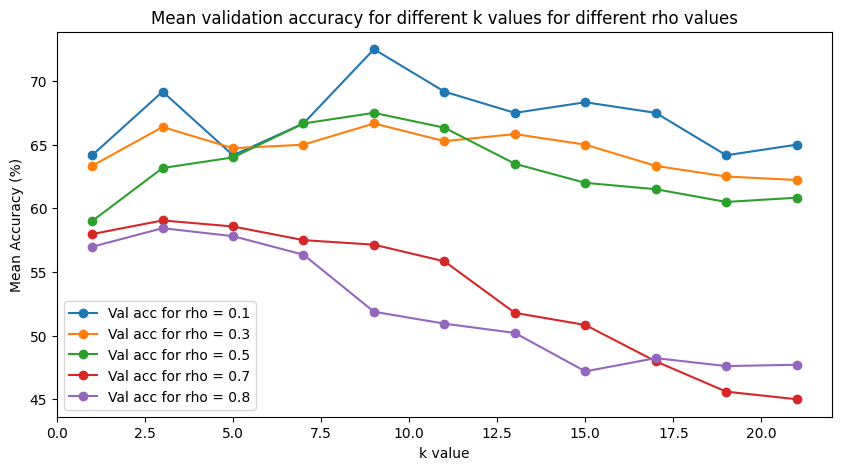

In [332]:
#Plotting mean validation accuracy for different k values for different rho values
plt.figure(figsize=(10, 5))
print(mean_acc_per_k_for_diff_rho)
for i in range(len(rho_values)):
    rho = rho_values[i]
    item = mean_acc_per_k_for_diff_rho[i]
    plt.plot(list(item.keys()), list(item.values()), marker='o', label='Val acc for rho = '+str(rho))
plt.xlabel('k value')
plt.ylabel('Mean Accuracy (%)')
plt.title('Mean validation accuracy for different k values for different rho values')
plt.legend()


Q6: How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide? <br>

#### Influence of rho on k

Different values of rho significantly impact the determination of the optimal k value. It is generally observed that as rho increases, the chosen best k value decreases. This trend suggests that a larger validation set, afforded by a higher rho, yields a more reliable estimation of the model's true performance. Consequently, this enables the selection of a simpler model, indicated by a smaller k value, which may be better at generalizing to unseen data.

#### Consistency with Repetitions

Despite the initial variability, the best_k values for each rho tend to stabilize as the number of repetitions increases. This pattern suggests that a higher number of repetitions helps to counteract the randomness introduced by shuffling during cross-validation. As a result, we achieve a more accurate and reliable estimation of the best best_k value for a given rho. This consistency underscores the importance of performing ample repetitions to ensure the robustness of the cross-validation results.


In [333]:
#Evaluate the performance on test set with the best hyper parameters ( i.e best k ).
test_predic = kNNClassify(X_train,Y_train,X_test,best_k,np.linalg.norm)
test_accuracy ,_, _, _=KNNAccuracy(Y_test,test_predic)
print(f'The best k value is {best_k} and test accuracy is {test_accuracy:.2f}%')
print(f'Test accuracy with k=3, obtained in part 2 is : {knn_accuracy:.2f}%')
print(f'Improvement in test accuracy = {(test_accuracy-knn_accuracy)/knn_accuracy*100:.2f}%')

The best k value is 7 and test accuracy is 70.00%
Test accuracy with k=3, obtained in part 2 is : 63.33%
Improvement in test accuracy = 10.53%


(7, 11)
For n = 200 , test accuracy is 70.00%
For n = 300 , test accuracy is 70.33%
For n = 400 , test accuracy is 67.50%
For n = 500 , test accuracy is 71.40%
For n = 600 , test accuracy is 70.00%
For n = 700 , test accuracy is 70.71%
For n = 800 , test accuracy is 72.12%


Text(0, 0.5, 'Best k')

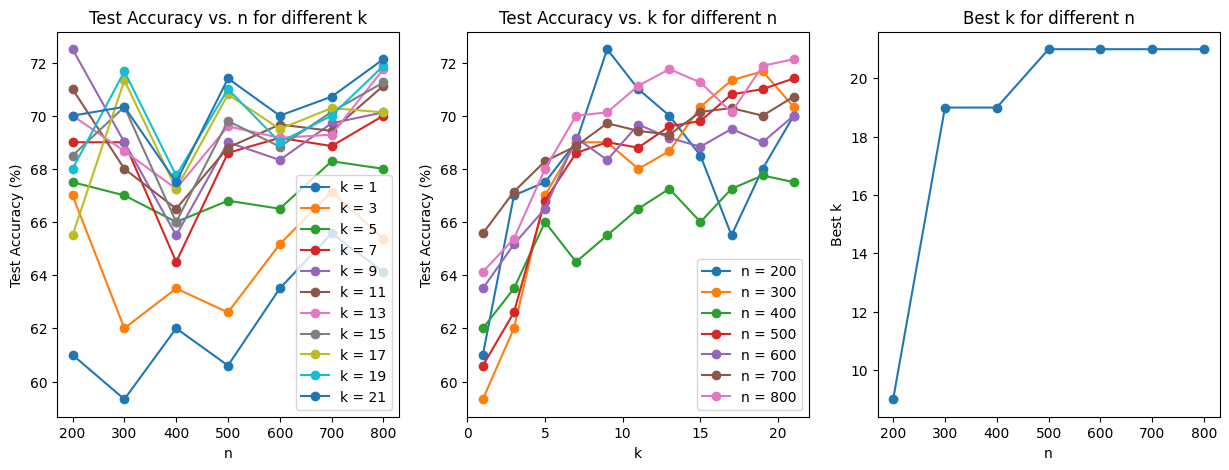

In [334]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################
#Performance evaluation as n increases

#n is the number of training data points 
n_values = [200, 300, 400, 500, 600, 700, 800]

#training data points per sample (total 4 samples)
trp_values = [int(n/4) for n in n_values]

#total points per sample
sp_values = [trp*2 for trp in trp_values]

k_range = [2 * i - 1 for i in range(1, 12)]  # Odd k values from 1 to 21
#n by k matrix to store test_accuracies (rows = n, columns = k)
test_accuracy_for_k_for_n = np.ones(shape=(len(n_values),len(k_range)))
print(test_accuracy_for_k_for_n.shape)

for i in range(len(n_values)):
    x_train, y_train, x_test, y_test = Generate_data(mean1,mean2,mean3,mean4,cov,sp_values[i],trp_values[i],sp_values[i]-trp_values[i])
    
    for j in range(len(k_range)):
        test_predictions = kNNClassify(x_train,y_train,x_test,k_range[j],np.linalg.norm)
        test_accuracy ,_, _, _=KNNAccuracy(y_test,test_predictions)
        test_accuracy_for_k_for_n[i][j] = test_accuracy

    print(f'For n = {n_values[i]} , test accuracy is {test_accuracy:.2f}%')

#plotting the graph of accuracies for different n
fig, axes = plt.subplots(1,3, figsize=(15, 5))

for i in range(len(k_range)):
    k = k_range[i]
    axes[0].plot(n_values, test_accuracy_for_k_for_n[:,i], marker='o', label=f'k = {k}')
    
axes[0].set_title('Test Accuracy vs. n for different k')
axes[0].legend()
axes[0].set_xlabel('n')
axes[0].set_ylabel('Test Accuracy (%)')

for i in range(len(n_values)):
    n = n_values[i]
    axes[1].plot(k_range, test_accuracy_for_k_for_n[i], marker='o', label=f'n = {n}')

axes[1].set_title('Test Accuracy vs. k for different n')
axes[1].legend()
axes[1].set_xlabel('k')
axes[1].set_ylabel('Test Accuracy (%)')

best_k_for_n = []

for i in range(len(n_values)):
    best_k_for_n.append(k_range[np.argmax(test_accuracy_for_k_for_n[i])])

# print(best_k_for_n) 
axes[2].plot(n_values, best_k_for_n, marker='o')
axes[2].set_title('Best k for different n')
axes[2].set_xlabel('n')
axes[2].set_ylabel('Best k')


**Observation of value of n on best k** <br>

- As the size of the training dataset increases, the best value of k initially increases sharply.
- The best k value starts at a lower number when the size of the training dataset is around 200 and increases to a higher value as n reaches 300.
- After this initial increase, the best k value plateaus and remains relatively constant even as the size of the training dataset continues to increase from n=300 to n=800.
-The plateau suggests that beyond a certain point, increasing the number of neighbors (k) does not significantly improve the model's performance, or it might even start to harm the performance due to over-smoothing.

**Reasons for these observations could include:**

- Initially, when the training dataset is small, a smaller k might be sufficient to capture the local structure of the data. As the dataset grows, a larger k is needed to maintain a representative sample of the local area.
- Once the training dataset is large enough, the local structure can be well-represented without further increasing k. This is why the best k value stabilizes.
- If k is too large relative to the size of the dataset, the model may start to consider too many points which are not actually 'neighbors' in a meaningful sense, leading to a decrease in the model's ability to make accurate predictions.


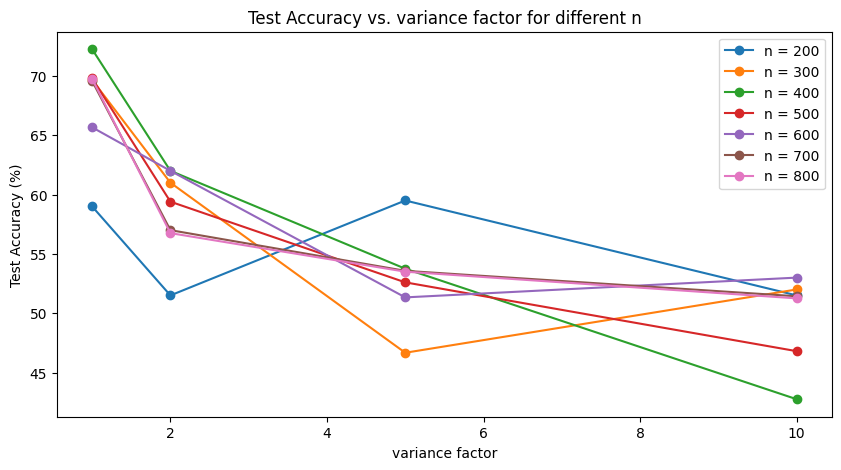

In [13]:
#Experiments with more difficult data set.

#increasing the variance and experimenting
def results_with_increased_variance(n_values,best_k_for_n,variance_factors):
    
    var_accuracies = np.ones(shape=(len(n_values),len(variance_factors)))

    for v,variance_factor in enumerate(variance_factors):
        
        new_cov = np.array(cov)*variance_factor

        for i,n in enumerate(n_values):
            k = best_k_for_n[i]

            x_train,y_train,x_test,y_test = Generate_data(mean1,mean2,mean3,mean4,new_cov,sp_values[i],trp_values[i],sp_values[i]-trp_values[i])

            test_predict = kNNClassify(x_train,y_train,x_test,k,np.linalg.norm)
            test_accuracy ,_, _, _=KNNAccuracy(y_test,test_predict)
            
            var_accuracies[i][v]= test_accuracy

    return var_accuracies

variance_factors = [1,2,5,10]
var_accuracies_for_n = results_with_increased_variance(n_values,best_k_for_n,variance_factors)

#plotting the graph of accuracies for different n
plt.figure(figsize=(10, 5))
for i in range(len(n_values)):
    n = n_values[i]
    plt.plot(variance_factors, var_accuracies_for_n[i], marker='o', label=f'n = {n}')
plt.title('Test Accuracy vs. variance factor for different n')
plt.xlabel('variance factor')
plt.ylabel('Test Accuracy (%)')
plt.legend()




The plot indicates that the performance of the KNN classifier is inversely related to the variance within the dataset; as the variance increases, the classifier's accuracy decreases. This trend is consistent across all training set sizes (n). However, larger training sets demonstrate higher initial accuracy and a more gradual decline in performance with increasing variance, suggesting that they are more robust to variance in the data. Despite this, at high variance factors, the performance across different training set sizes converges, highlighting that there is a limit to the benefit gained from simply increasing the training set size when dealing with highly variable data.

In [336]:
##################################
#Part(e): Influence of distance measure on KNN classifier
##################################
#Performance evaluation of KNN classifier with different distance measures

#defining different distance measures
# x is a vector containing [x1 x2]

#Manhattan distance
def L1_norm(x):
  return np.sum(np.abs(x))

#Euclidean distance
def L2_norm(x):
  return np.sum(np.abs(x)**2)**1/2

def L3_norm(x):
  return np.sum(np.abs(x)**3)**1/3

def L4_norm(x):
  return np.sum(np.abs(x)**4)**1/4

def L5_norm(x):
  return np.sum(np.abs(x)**5)**1/5

def L6_norm(x):
  return np.sum(np.abs(x)**6)**1/6

distance_metrics = [L1_norm,L2_norm,L3_norm,L4_norm,L5_norm]


Best distance metric is L2 norm


Text(0, 0.5, 'Test Accuracy (%)')

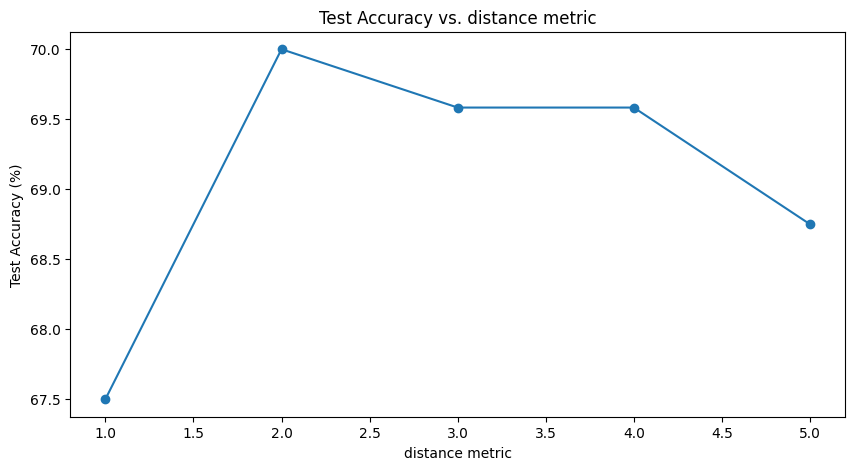

In [339]:

accuracies = []
predictions_for_dist = {k:[] for k in range(1,len(distance_metrics)+1)}
for i in range(1,len(distance_metrics)+1):
  distance_func=distance_metrics[i-1]
  test_predict = kNNClassify(X_train,Y_train,X_test,best_k,distance_func)
  acc,_,_,_ = KNNAccuracy(Y_test,test_predict)
  predictions_for_dist[i]=test_predict
  accuracies.append(acc)
  # print(accuracies[i-1])

best_distance_metric = np.argmax(accuracies)+1
print(f'Best distance metric is L{best_distance_metric} norm')

#plotting the graph of accuracies for different distance measures
plt.figure(figsize=(10, 5))
plt.plot(range(1,len(distance_metrics)+1), accuracies, marker='o')
plt.title('Test Accuracy vs. distance metric')
plt.xlabel('distance metric')
plt.ylabel('Test Accuracy (%)')


Decision region for L1 Norm distance metric


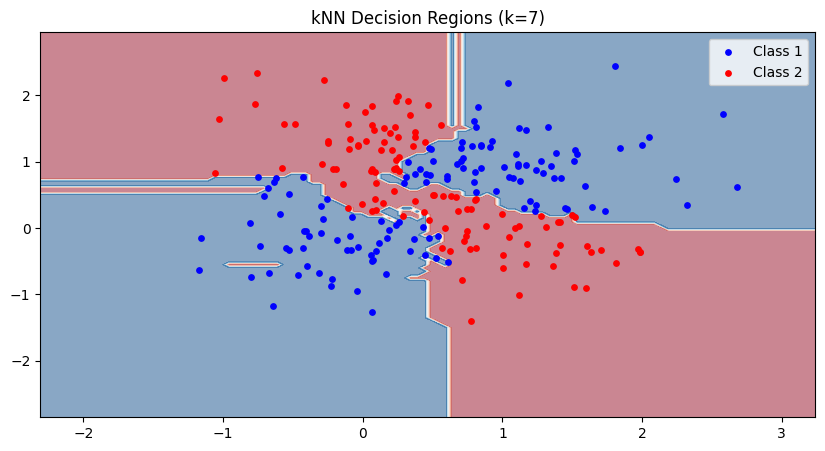

Decision region for L2 Norm distance metric


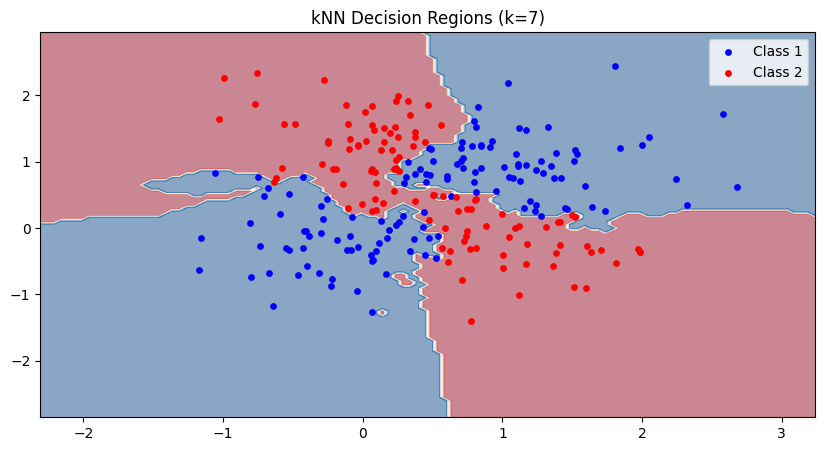

Decision region for L3 Norm distance metric


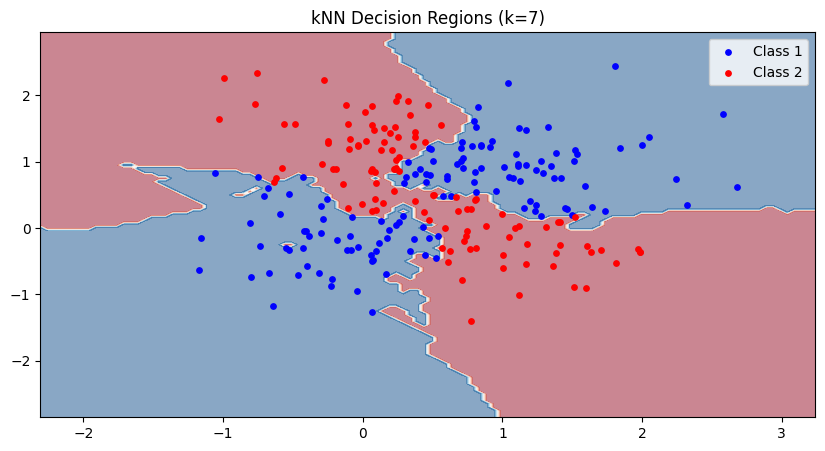

Decision region for L4 Norm distance metric


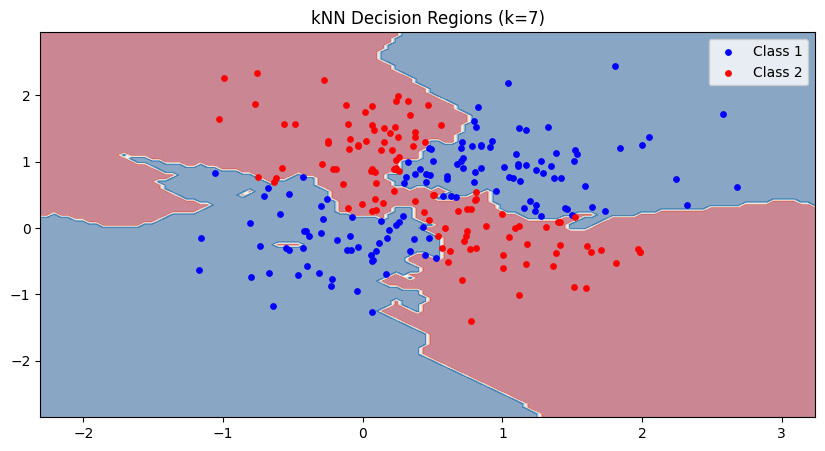

Decision region for L5 Norm distance metric


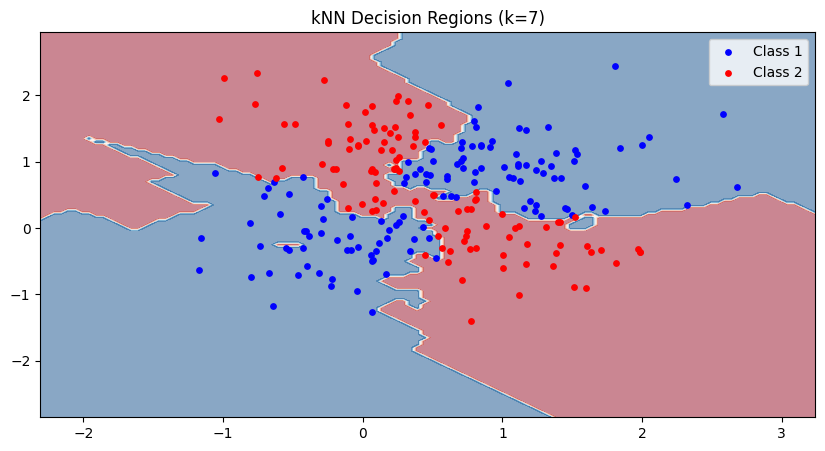

In [340]:
#Understand the decision regions of KNN classifier with different distance measure
for i in range(len(distance_metrics)):
  distance_metric = distance_metrics[i]
  class1_points = np.array([k[0] for k in predictions_for_dist[i+1] if k[1]==1])
  class2_points = np.array([k[0] for k in predictions_for_dist[i+1] if k[1]==-1])
  print(f'Decision region for L{i+1} Norm distance metric')
  plot_decision_regions(X_train,Y_train,best_k,class1_points,class2_points,distance_metric,True)


**Analysing decision regions for different distance metrics**

- L1 Norm (Manhattan Distance): The decision boundary is characterized by horizontal and vertical lines, reflecting the nature of the L1 norm where movement is restricted to axes-aligned paths. This can lead to decision regions that resemble blocks or diamonds.

- L2 Norm (Euclidean Distance): The decision boundary is smoother and more circular compared to L1. This is because the L2 norm measures the shortest path (straight line) between points, resulting in more rounded decision regions that are generally considered more natural for isotropic spaces.

- L3 Norm: The decision boundary starts to show a mix of characteristics between L1 and L2. The regions are less blocky than L1 but not as round as L2, indicating a transition phase between the Manhattan and Euclidean distance metrics.

- L4 Norm: The decision regions become more angular and less rounded compared to L3, with the boundary lines starting to form shapes that have flat edges and sharp corners, but less so than L1.

- L5 Norm: The decision regions continue the trend observed in L4, with even more pronounced angles and a tendency towards shapes with flat edges and sharp corners, although the regions are not as extreme as with the L1 norm. <br>

In conclusion, as the order of the Lp norm increases from L1 to L5, the decision boundaries transition from blocky, axes-aligned shapes to more rounded shapes, and then back towards angular shapes with flat edges and sharp corners. The L2 norm typically provides the most natural-looking decision regions for many datasets, especially those where the inherent distance between points is best represented in a Euclidean space

In [16]:
##################################
#Part(f): Influence of distance measure on KNN classifier
##################################

#Load MNIST data

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()



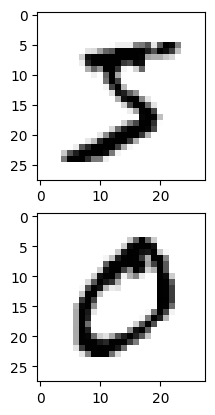

In [17]:
#Plot a few images
plt.subplot(211)
plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
plt.subplot(212)
plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')



In [280]:
#taking n images 
n=500
n_images = images[:n]
n_targets = targets[:n]

In [281]:
#Create train, validation and test splits
def train_val_test_split(images,targets,train_size,val_size,test_size):
    n = len(images)
    n_train = int(n*train_size)
    n_val = int(n*val_size)
    n_test = int(n*test_size)
    
    #shuffle images and target together
    idx = np.random.permutation(n)
    images = images[idx]
    targets = targets[idx]

    train_images = images[:n_train]
    train_targets = targets[:n_train]
    val_images = images[n_train:n_train+n_val]
    val_targets = targets[n_train:n_train+n_val]
    test_images = images[n_train+n_val:]
    test_targets = targets[n_train+n_val:]
    return train_images,train_targets,val_images,val_targets,test_images,test_targets

#Write 'MultiClassKNNClassify' function
def MultiClassKNNClassify(train_images,train_targets,val_images,k,distance_function):
    
    predicted_targets = []
    for i in range(len(val_images)):
        #initializing a list to store distances and labels [dist,label]
        distances=[]
        test_data_point = val_images[i]

        #iterating through training points and computing distances of training points from test point
        for j in range(len(train_images)):
            # print(test_data_point-X_train[j])
            distances.append([distance_function(test_data_point-train_images[j]),train_targets[j]])
        
        #sorting the distances based on the first element of the list (distance)
        distances = sorted(distances,key=lambda x:x[0])
        
        #list to store number of output classes for first k neighbours
        classes = np.ones(10,)
        for i in range(k):
            classes[int(distances[i][1])]+=1

        #predicting the label
        predicted_class = np.argmax(classes)
        predicted_targets.append(predicted_class)

    return predicted_targets

def accuracy(true,predicted):
    n = len(true)
    correct = 0
    for i in range(n):
        if int(true[i])==predicted[i]:
            correct+=1
    return (correct/n)*100 

train_images,train_targets,val_images,val_targets,test_images,test_targets = train_val_test_split(n_images,n_targets,0.8,0.1,0.1)
val_predictions = MultiClassKNNClassify(train_images,train_targets,val_images,21,np.linalg.norm) 
val_acc = accuracy(val_targets,val_predictions)
print(f'Validation accuracy = {val_acc:.2f}%')


Validation accuracy = 74.00%


In [299]:
#Empirically chose most suitable k and error function based on the evauation on cross-validation data
#Evaluate the performance using different values of 'k' on the validation data and select the optimal 'k' for the test data.
#Evaluation the performance using different distance measures (l1,l2, etc) on the validation data and select the optimal distance measure for test data.

k_range = [4 * i - 1 for i in range(1, int(np.sqrt(n)/2))]  #[3,7, ... ]
distance_metrics = [L1_norm,L2_norm,L3_norm,L4_norm,L5_norm]
best_acc_per_k = {}
distance_metric_for_best_k = {}
numrep = 5
for k in k_range:
    best_acc = 0
    for distance_metric in distance_metrics:
        for i in range(numrep):
            train_images,train_targets,val_images,val_targets,test_images,test_targets = train_val_test_split(n_images,n_targets,0.8,0.1,0.1)
            val_predictions = MultiClassKNNClassify(train_images,train_targets,val_images,k,distance_metric)
        val_acc = accuracy(val_targets,val_predictions)
        if val_acc > best_acc:
            best_acc = val_acc

    best_acc_per_k[k] = best_acc
    distance_metric_for_best_k[k] = distance_metric

for k in best_acc_per_k:
    print(f'k = {k} , best validation accuracy = {best_acc_per_k[k]:.2f}%')

best_k = max(best_acc_per_k,key=lambda x:best_acc_per_k[x])
best_distance_metric = distance_metric_for_best_k[best_k]
print(f'Best k = {best_k} , best distance metric = {best_distance_metric.__name__}')



k = 3 , best validation accuracy = 92.00%
k = 7 , best validation accuracy = 90.00%
k = 11 , best validation accuracy = 88.00%
k = 15 , best validation accuracy = 84.00%
k = 19 , best validation accuracy = 82.00%
k = 23 , best validation accuracy = 82.00%
k = 27 , best validation accuracy = 82.00%
k = 31 , best validation accuracy = 82.00%
k = 35 , best validation accuracy = 78.00%
k = 39 , best validation accuracy = 72.00%
Best k = 3 , best distance metric = L5_norm


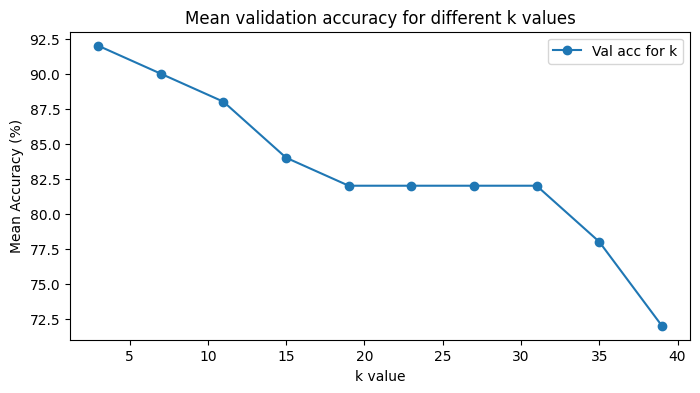

In [300]:
#plotting accuracy vs k
plt.figure(figsize=(8, 4))
plt.plot(list(best_acc_per_k.keys()), list(best_acc_per_k.values()), marker='o', label='Val acc for k')
plt.xlabel('k value')
plt.ylabel('Mean Accuracy (%)')
plt.title('Mean validation accuracy for different k values')
plt.legend()

In [312]:
#Evaluate the performance on test data with the best hyper parameters ( k, error_func ) obtained from cross validation
test_predictions = MultiClassKNNClassify(train_images,train_targets,test_images,best_k,best_distance_metric)
test_accuracy = accuracy(test_targets,test_predictions)
print(f'Test accuracy with k = {best_k} and distance metric = {best_distance_metric.__name__} is {test_accuracy:.2f}%')

#Create a confusion matrix for test data
def compute_confusion_matrix(true, pred):
    '''
    Inputs: Ground truth labels and classifier predictions
    Outputs: Confusion matrix
    '''
    confusion_mat = np.zeros((10,10),dtype=int)

    for i in range(len(true)):
        confusion_mat[int(true[i])][pred[i]]+=1

    return confusion_mat

confusion_mat = compute_confusion_matrix(test_targets,test_predictions)
print(confusion_mat)

#finding number of wrongly predicted class points from confusion matrix
wrongly_predicted = {}
for i in range(10):
    wrongly_predicted[i] = sum(confusion_mat[i])-confusion_mat[i][i]
print(f'\nClass   : Number of wrongly predicted')
for i in range(10):
    print(f'Digit {i} : {wrongly_predicted[i]}')



Test accuracy with k = 3 and distance metric = L5_norm is 90.00%
[[7 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0]
 [0 1 7 0 1 0 0 1 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 6 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 6 0 0 0]
 [0 0 1 0 0 0 0 3 0 0]
 [0 0 0 1 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 4]]

Class   : Number of wrongly predicted
Digit 0 : 0
Digit 1 : 0
Digit 2 : 3
Digit 3 : 0
Digit 4 : 0
Digit 5 : 0
Digit 6 : 0
Digit 7 : 1
Digit 8 : 1
Digit 9 : 0


**Observations on the Confusion Matrix of KNN Classifier on MNIST Test Data**

1. **Perfect Accuracy for Many Digits:**
   - The KNN classifier achieves perfect accuracy (no misclassifications) for digits 0, 1, 4, 5, 6, and 9. This is indicated by the diagonal entries being the only non-zero values in their respective rows.

2. **Few Misclassifications:**
   - Digits 2, 3, 7, and 8 exhibit minimal misclassifications.
   - Digit 2 is the most challenging, with 3 misclassifications, suggesting some confusion with other digits.

3. **Misclassification Details:**
   - Digit 7 has one misclassification as digit 2.
   - Digit 8 has one misclassification as digit 3.


In [275]:
#Suggest an alternative ways to improve performance

#to increse performance we can perform Z score normalization
def Z_score_normalization(X):
    mean = np.mean(X,axis=0)
    std_dev = np.std(X,axis=0)
    std_dev[std_dev == 0] = 1
    scaled_data = (X-mean)/std_dev
    return scaled_data

train_images,train_targets,val_images,val_targets,test_images,test_targets = train_val_test_split(n_images,n_targets,0.8,0.1,0.1)
test_predictions = MultiClassKNNClassify(train_images,train_targets,test_images,best_k,best_distance_metric)
test_accuracy = accuracy(test_targets,test_predictions)
print(f'Test accuracy before normalization with k = {best_k} and distance metric = {best_distance_metric.__name__} is {test_accuracy:.2f}%')

# Feature Scaling
train_images_scaled = Z_score_normalization(train_images)
val_images_scaled = Z_score_normalization(val_images)
test_images_scaled = Z_score_normalization(test_images)

#Evaluate the performance on test data after normalizing
test_predictions = MultiClassKNNClassify(train_images_scaled,train_targets,test_images_scaled,best_k,best_distance_metric)
test_accuracy = accuracy(test_targets,test_predictions)
print(f'Test accuracy after normalization with k = {best_k} and distance metric = {best_distance_metric.__name__} is {test_accuracy:.2f}%')

Test accuracy before normalization with k = 11 and distance metric = L5_norm is 80.00%
Test accuracy after normalization with k = 11 and distance metric = L5_norm is 82.00%


<b> Report your observations </b>

1. Write down the best accuracy on synthetic test data generated from Gaussian distribution
- The best accuracy on synthetic test data generated from Gaussian distribution is 70% achieved using k=7.

2. Write down the best accuracy on MNIST validation and test data.
- The best accuracy on MNIST validation and test data is 92% achieved using k=3.

